## ITE 17 Data Mining

Final Activity 2 [By Pair]: Time Series Forecasting

Due Date: July 7, 2025

Objectives:
1. Develop a time series forecast model for time series data. Develop a time series forecasting model for the productsales.csv dataset. Use the total sales data covered from years 2010-2018 for training and the dates covered by the year
2019 for testing.

#### Explore the data and apply preprocessing techniques (including testing stationarity) 
prior to developing the model. Apply descriptive analysis and interpret the results (ex: Which
product type is the most or least sold? Which stores have the most or least number of
action figures sold?)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Data exploration
sales = pd.read_csv("../data/productsales.csv")
print("First 5 rows:")
print(sales.head()) 

print("\nColumn types & missing values:")
print(sales.info())  

print("\nMissing values per column:")
print(sales.isnull().sum())  

print("\nCheck time range/frequency:")
print(sales['date'].describe())

print("\nCheck for duplicate entries:")
sales.duplicated().sum() 


First 5 rows:
   stall_id  product_type        date  number_sold
0         0             0  2010-01-01          801
1         0             0  2010-01-02          810
2         0             0  2010-01-03          818
3         0             0  2010-01-04          796
4         0             0  2010-01-05          808

Column types & missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255640 entries, 0 to 255639
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   stall_id      255640 non-null  int64 
 1   product_type  255640 non-null  int64 
 2   date          255640 non-null  object
 3   number_sold   255640 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ MB
None

Missing values per column:
stall_id        0
product_type    0
date            0
number_sold     0
dtype: int64

Check time range/frequency:
count         255640
unique          3652
top       2019-12-31
freq              70

np.int64(0)

#### Data Preprocessing

In [3]:
# Preprocess data
sales['date'] = pd.to_datetime(sales['date']) # Convert date column to datetime data type
sales = sales.sort_values('date')  # Ensure chronological order
sales

,stall_id,product_type,date,number_sold
0,0,0,2010-01-01,801
223516,6,8,2010-01-01,782
3287,0,1,2010-01-01,851
49305,1,5,2010-01-01,792
46018,1,4,2010-01-01,732
...,...,...,...,...
247244,4,6,2019-12-31,1045
247974,4,8,2019-12-31,967
252354,6,0,2019-12-31,795
243594,3,6,2019-12-31,354


#### Descriptive Analysis

In [2]:
# Aggregate total daily sales (across all stalls and products)
daily_sales = sales.groupby('date')['number_sold'].sum().reset_index()
daily_sales.set_index('date', inplace=True)
daily_sales

,number_sold
date,
2010-01-01,54870
2010-01-02,54960
2010-01-03,54863
2010-01-04,54926
2010-01-05,54634
...,...
2019-12-27,55540
2019-12-28,55675
2019-12-29,55677


#### Used Exploratory Data Analysis (EDA) to analyze the dataset
- still exploring the dataset

In [24]:
# 1. Most/Least Sold Products
product_stats = sales.groupby('product_type')['number_sold'].sum().sort_values(ascending=False)
print("Top 3 Products by Sales:\n", product_stats.head(3))
print("\nBottom 3 Products by Sales:\n", product_stats.tail(3))

# 2. Most/Least Profitable Stalls
stall_stats = sales.groupby('stall_id')['number_sold'].sum().sort_values(ascending=False)
print("\nTop 3 Stalls by Sales:\n", stall_stats.head(3))
print("\nBottom 3 Stalls by Sales:\n", stall_stats.tail(3))

Top 3 Products by Sales:
 product_type
7    21293947
4    20955555
6    20573320
Name: number_sold, dtype: int64

Bottom 3 Products by Sales:
 product_type
3    18964340
0    18620577
8    18361679
Name: number_sold, dtype: int64

Top 3 Stalls by Sales:
 stall_id
4    35614244
5    32561336
6    31896887
Name: number_sold, dtype: int64

Bottom 3 Stalls by Sales:
 stall_id
2    29943377
1    26309774
3    12566763
Name: number_sold, dtype: int64


#### Visualization for Total Daily Sales (2010-2019)

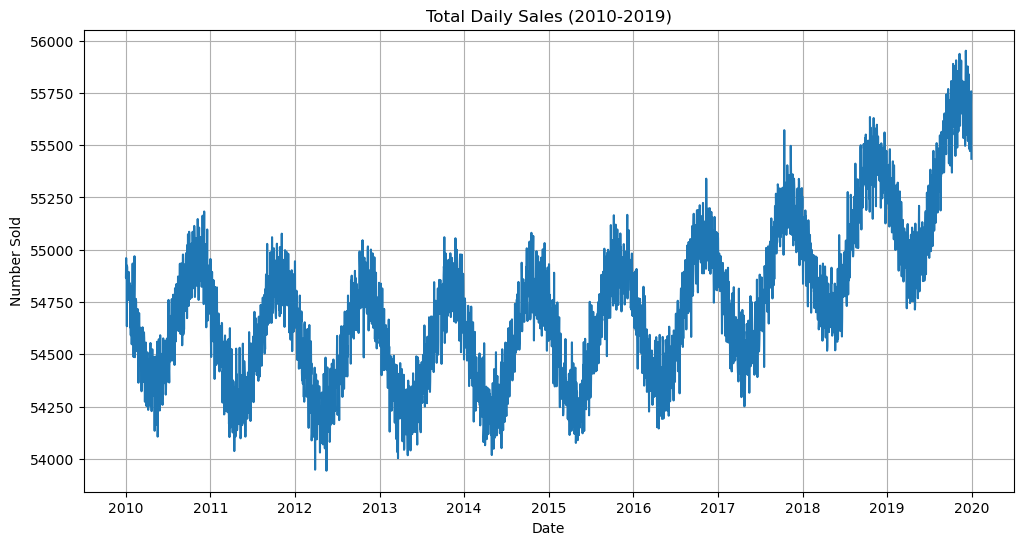

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['number_sold'])
plt.title("Total Daily Sales (2010-2019)")
plt.xlabel("Date")
plt.ylabel("Number Sold")
plt.grid()
plt.show()

#### Stationarity Check
- used Augmented Dickey-Fuller (ADF) test to determine if a series is stationary.
- still exploring dataset

3. Explore and provide the metrics used to evaluate the performance of the developed
model. Provide the results and remarks.

In [26]:
# Stationarity Check
adf_test = adfuller(daily_sales['number_sold'])
print(f"ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Series is non-stationary. Applying differencing...")
    daily_sales['sales_diff'] = daily_sales['number_sold'].diff().dropna()
    adf_diff = adfuller(daily_sales['sales_diff'].dropna())
    print(f"ADF after differencing: p-value = {adf_diff[1]}")

ADF Statistic: -2.5000751663649283, p-value: 0.11545603704177171
Series is non-stationary. Applying differencing...
ADF after differencing: p-value = 7.989694483214081e-10


#### Decompose to check trend/seasonality
- to check underlying patterns and dynamics of the data
- still exploring dataset

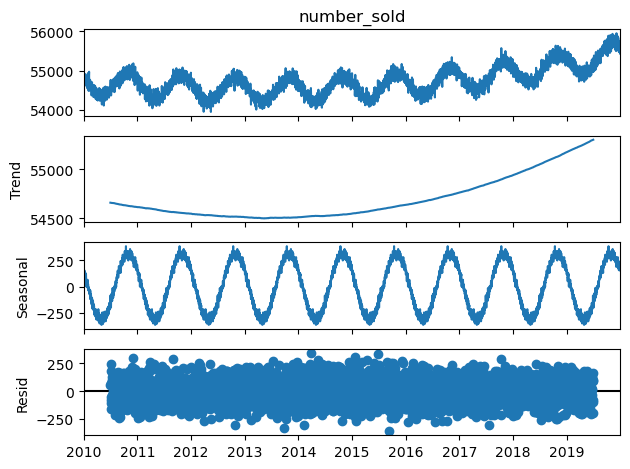

In [27]:
# Decompose to check trend/seasonality
decomposition = seasonal_decompose(daily_sales['number_sold'], period=365)  # Annual seasonality
decomposition.plot()
plt.show()

4. Present plots of the actual and predicted data.

#### 4.1 Developing the SARIMA model for time series

C:\Users\Admin\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                       number_sold   No. Observations:                 3287
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood              -19431.190
Date:                           Sun, 06 Jul 2025   AIC                          38868.379
Time:                                   20:30:24   BIC                          38886.665
Sample:                               01-01-2010   HQIC                         38874.927
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8030      0.011    -75.533      0.000      -0.824      -0.782
ma.S.L7       -0.9994      0.021    -48.162

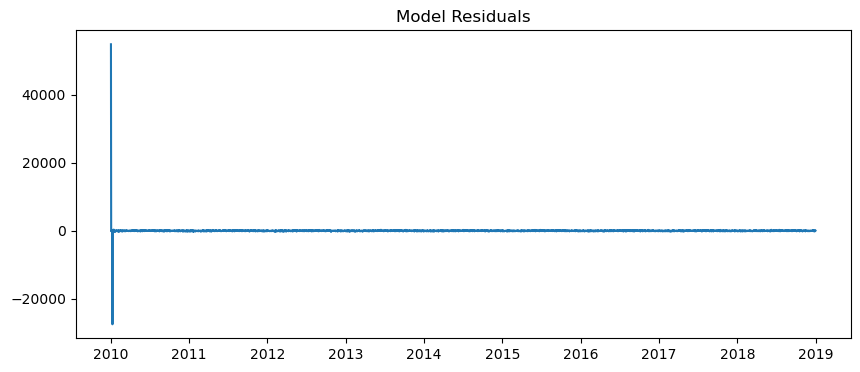

In [28]:
# --- Train-Test Split ---
train = daily_sales.loc['2010-01-01':'2018-12-31']
test = daily_sales.loc['2019-01-01':'2019-12-31']

# --- Model Training (SARIMA) ---
# Example parameters (adjust based on ACF/PACF plots in practice)
model = SARIMAX(train['number_sold'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 7))
results = model.fit(disp=False)
print(results.summary())

residuals = results.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Model Residuals")
plt.show()

#### Forecasting on Test Set

In [29]:
# Forecasting on Test Set
forecast = results.get_forecast(steps=len(test))
predicted_sales = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

#### Evaluation Metrics
- used MAE, RMSE, and MAPE to evaluate the predictions

In [7]:
# Evaluation Metrics
mae = mean_absolute_error(test['number_sold'], predicted_sales)
rmse = np.sqrt(mean_squared_error(test['number_sold'], predicted_sales))
mape = np.mean(np.abs((test['number_sold'] - predicted_sales) / test['number_sold'])) * 100

print("\n=== Model Performance ===")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


=== Model Performance ===
MAE: 258.72
RMSE: 297.41
MAPE: 0.47%


#### Visualization of the Actual vs the Predicted

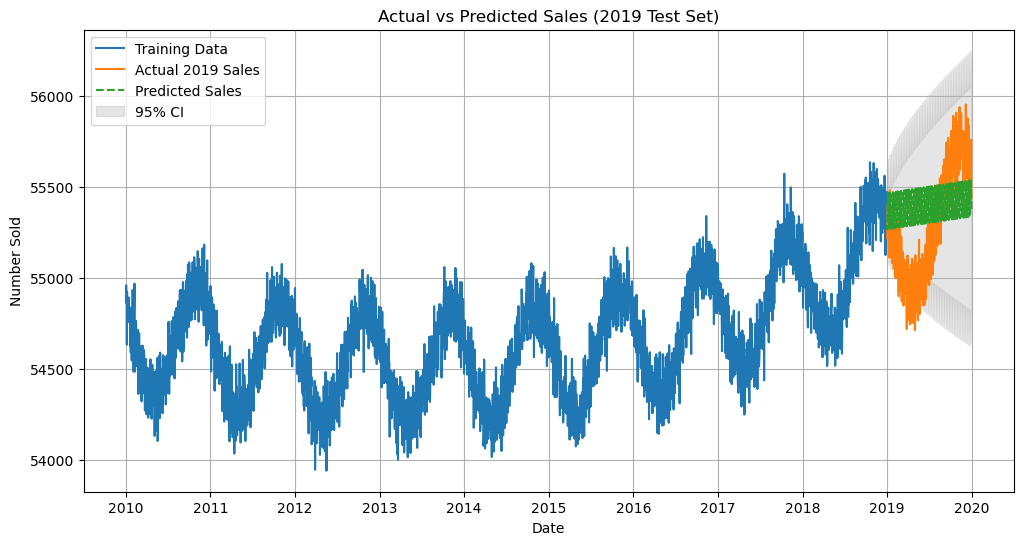

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['number_sold'], label='Training Data')
plt.plot(test.index, test['number_sold'], label='Actual 2019 Sales')
plt.plot(test.index, predicted_sales, label='Predicted Sales', linestyle='--')
plt.fill_between(test.index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='gray', alpha=0.2, label='95% CI')
plt.title("Actual vs Predicted Sales (2019 Test Set)")
plt.xlabel("Date")
plt.ylabel("Number Sold")
plt.legend()
plt.grid()
plt.show()